In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
#from tensorflow_probability.random import rademacher
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import ReLU, Dropout
from tensorflow.keras.optimizers import Adam

from numpy.random import seed
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Phenology

# output csv

In [ ]:
def load_and_prepare_data(year):
    # Generate synthetic data
    file_path = "/content/drive/MyDrive/Lab/BNN/Data/PBCNN/phenology/corn_input_final.csv"  # Change this to your file path
    df = pd.read_csv(file_path)
    df = df.dropna()

    # Specify the test and validation years
    test_years = [year]

    # Create data splits
    test_df = df[df['year'].isin(test_years)]
    train_df = df[(df['year'] < test_years[0]) & (~df['year'].isin(test_years))]

    # Assuming the last column is the target variable
    X_train = train_df.iloc[:, 3:-1].values.astype(np.float32)
    X_test = test_df.iloc[:, 3:-1].values.astype(np.float32)
    y_train = train_df.iloc[:, -1].values.astype(np.float32)
    y_test = test_df.iloc[:, -1].values.astype(np.float32)

    # Normalize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  # Fit only on training data
    X_test = scaler.transform(X_test)        # Use the same transformation

    # Reshape y_train and y_val to have shape (number of samples, 1)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    return X_train, X_test, y_train, y_test, test_df


# Create an empty list to store data for all years
all_data = []

for year in range(2019, 2023 + 1):
    # Load and prepare data for the current year
    X_train, X_test, y_train, y_test, test_df = load_and_prepare_data(year)

    # Train the Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train.ravel())

    # Predict on test set
    y_test_pred = rf.predict(X_test)

    # Store ground truth, predictions, and GEOID for the current year
    year_data = pd.DataFrame({'Year': [year] * len(y_test),
                              'GEOID': test_df['GEOID'].values,  # Add GEOID column
                              'GroundTruth': y_test.ravel(),
                              'Predictions': y_test_pred})
    all_data.append(year_data)

# Concatenate data for all years into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

# Save the DataFrame to a CSV file
all_data_df.to_csv('/content/drive/MyDrive/Lab/BNN/Data/PBCNN/phenology/RF_predictions_phe.csv', index=False)

# scatter plot

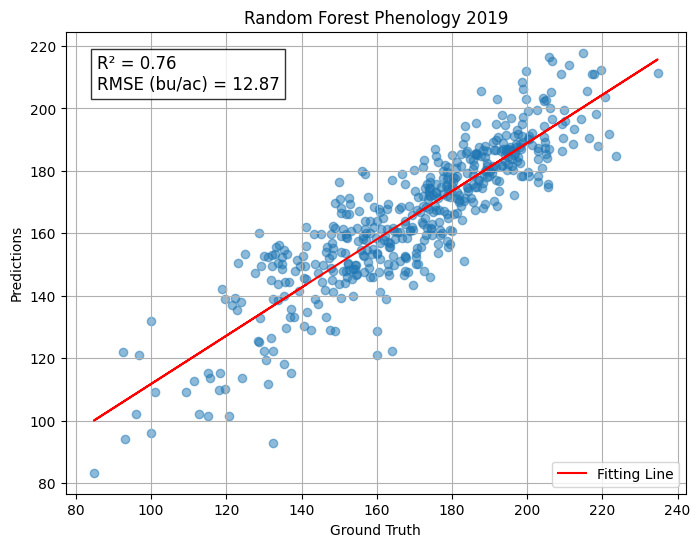

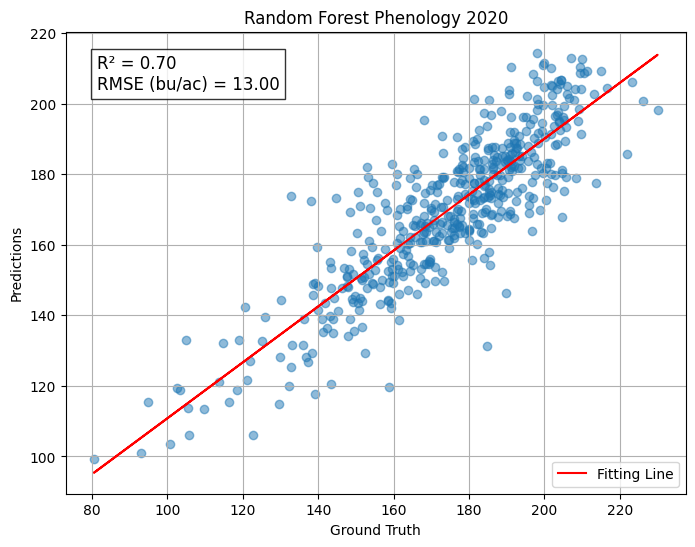

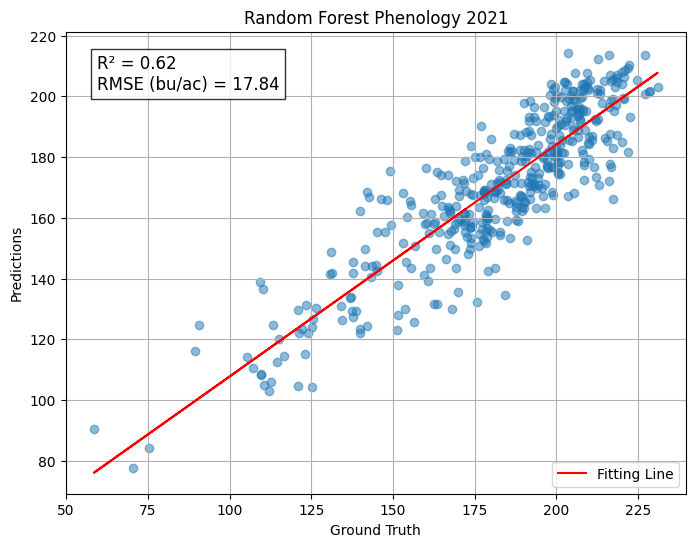

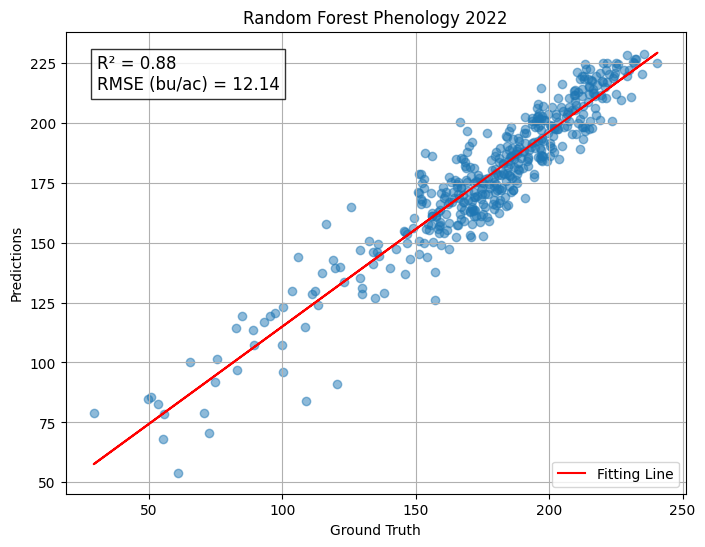

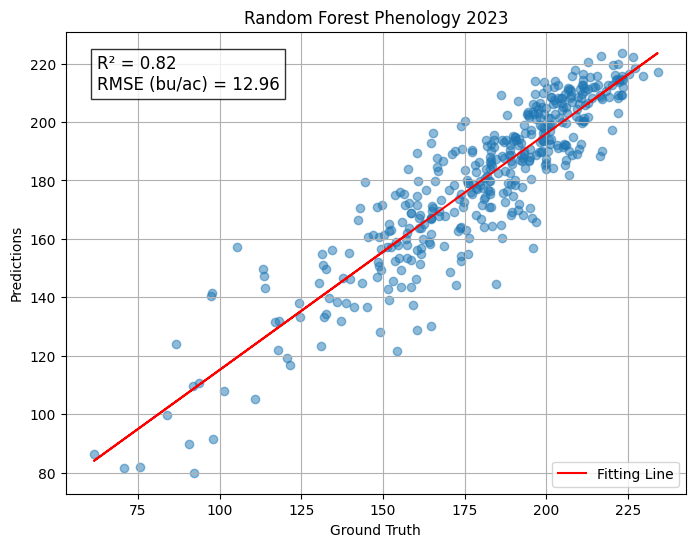

In [ ]:
# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Lab/BNN/Data/PBCNN/phenology/RF_predictions_phe.csv')

# Create scatter plots for each year
for year in data['Year'].unique():
    year_data = data[data['Year'] == year]
    plt.figure(figsize=(8, 6))
    plt.scatter(year_data['GroundTruth'], year_data['Predictions'], alpha=0.5)
    plt.xlabel("Ground Truth")
    plt.ylabel("Predictions")
    plt.title(f"Random Forest Phenology {year}")
    plt.grid(True)

    # Add fitting line
    m, b = np.polyfit(year_data['GroundTruth'], year_data['Predictions'], 1)  # Fit a line
    plt.plot(year_data['GroundTruth'], m * year_data['GroundTruth'] + b, color='red', label='Fitting Line')

    # Calculate R-squared and RMSE
    test_r2 = r2_score(year_data['GroundTruth'], year_data['Predictions'])
    test_rmse = np.sqrt(mean_squared_error(year_data['GroundTruth'], year_data['Predictions']))

    # Add R-squared and RMSE to the plot
    textstr = f'R² = {test_r2:.2f}\nRMSE (bu/ac) = {test_rmse:.2f}'
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    plt.legend()  # Show legend for the fitting line
    plt.show()

# 16 days

# output csv

In [ ]:
def load_and_prepare_data(year):
    # Generate synthetic data
    file_path = "/content/drive/MyDrive/Lab/BNN/Data/PBCNN/16days/corn_input_final.csv"  # Change this to your file path
    df = pd.read_csv(file_path)
    df = df.dropna()

    # Specify the test and validation years
    test_years = [year]

    # Create data splits
    test_df = df[df['year'].isin(test_years)]
    train_df = df[(df['year'] < test_years[0]) & (~df['year'].isin(test_years))]

    # Assuming the last column is the target variable
    X_train = train_df.iloc[:, 3:-1].values.astype(np.float32)
    X_test = test_df.iloc[:, 3:-1].values.astype(np.float32)
    y_train = train_df.iloc[:, -1].values.astype(np.float32)
    y_test = test_df.iloc[:, -1].values.astype(np.float32)

    # Normalize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  # Fit only on training data
    X_test = scaler.transform(X_test)        # Use the same transformation

    # Reshape y_train and y_val to have shape (number of samples, 1)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    return X_train, X_test, y_train, y_test, test_df


# Create an empty list to store data for all years
all_data = []

for year in range(2019, 2023 + 1):
    # Load and prepare data for the current year
    X_train, X_test, y_train, y_test, test_df = load_and_prepare_data(year)

    # Train the Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train.ravel())

    # Predict on test set
    y_test_pred = rf.predict(X_test)

    # Store ground truth, predictions, and GEOID for the current year
    year_data = pd.DataFrame({'Year': [year] * len(y_test),
                              'GEOID': test_df['GEOID'].values,  # Add GEOID column
                              'GroundTruth': y_test.ravel(),
                              'Predictions': y_test_pred})
    all_data.append(year_data)

# Concatenate data for all years into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

# Save the DataFrame to a CSV file
all_data_df.to_csv('/content/drive/MyDrive/Lab/BNN/Data/PBCNN/16days/RF_predictions_16.csv', index=False)

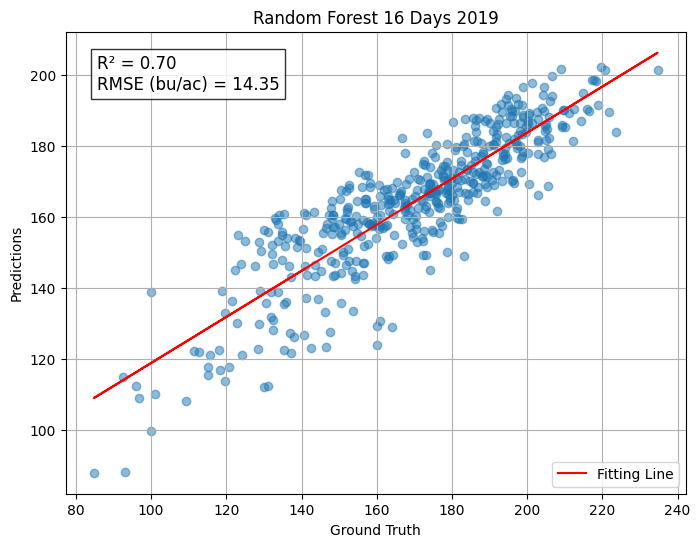

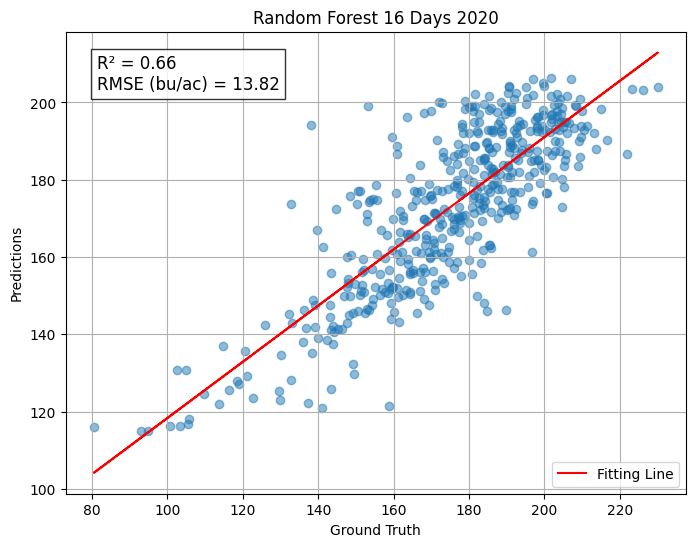

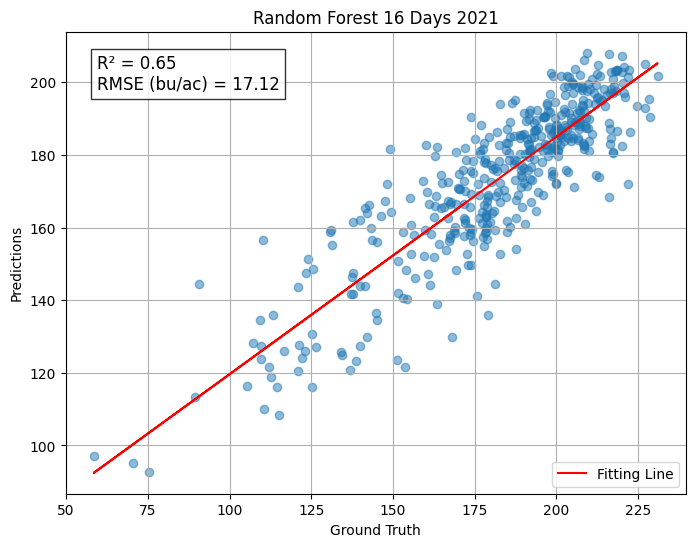

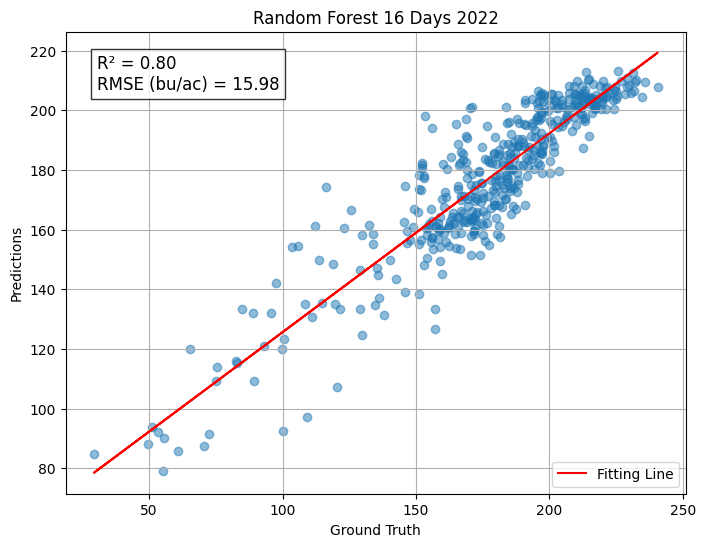

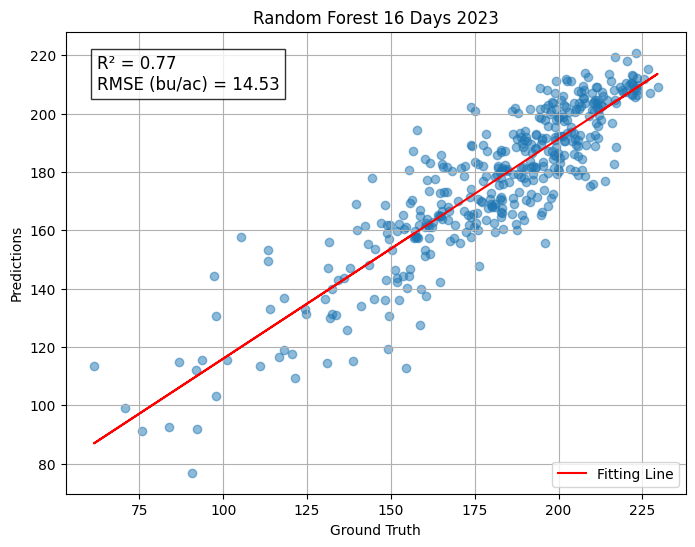

In [ ]:
# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Lab/BNN/Data/PBCNN/16days/RF_predictions_16.csv')

# Create scatter plots for each year
for year in data['Year'].unique():
    year_data = data[data['Year'] == year]
    plt.figure(figsize=(8, 6))
    plt.scatter(year_data['GroundTruth'], year_data['Predictions'], alpha=0.5)
    plt.xlabel("Ground Truth")
    plt.ylabel("Predictions")
    plt.title(f"Random Forest 16 Days {year}")
    plt.grid(True)

    # Add fitting line
    m, b = np.polyfit(year_data['GroundTruth'], year_data['Predictions'], 1)  # Fit a line
    plt.plot(year_data['GroundTruth'], m * year_data['GroundTruth'] + b, color='red', label='Fitting Line')

    # Calculate R-squared and RMSE
    test_r2 = r2_score(year_data['GroundTruth'], year_data['Predictions'])
    test_rmse = np.sqrt(mean_squared_error(year_data['GroundTruth'], year_data['Predictions']))

    # Add R-squared and RMSE to the plot
    textstr = f'R² = {test_r2:.2f}\nRMSE (bu/ac) = {test_rmse:.2f}'
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    plt.legend()  # Show legend for the fitting line
    plt.show()